In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
# Reading our data
df = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
df.shape

(7787, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
#Checking for unique values
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# Helps to visualize missing values in each columns
import missingno as msno

<AxesSubplot:>

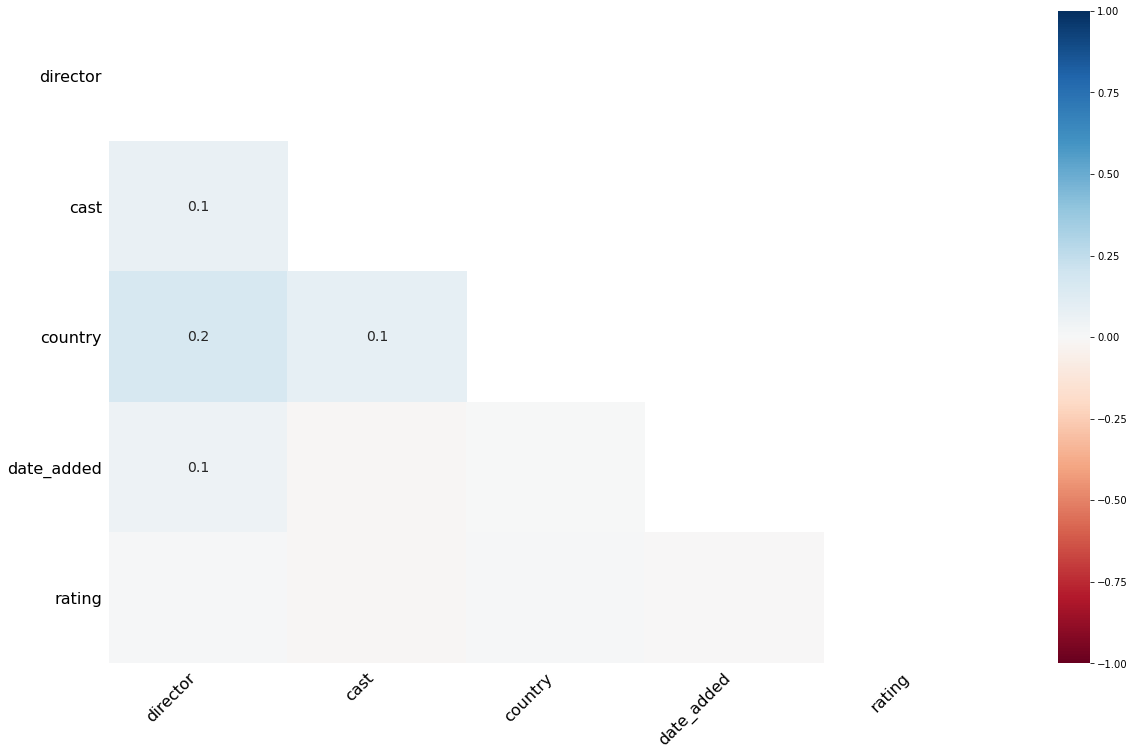

In [10]:
# Showing NaN values by using heatmap
msno.heatmap(df)

## Data Cleaning:

In [11]:
#There is only seven NaN values in rating, so I'll just put values.
df[df['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
2359,s2360,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
3660,s3661,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
3736,s3737,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
3737,s3738,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
3738,s3739,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
4323,s4324,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [12]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [13]:
changing_nan = {
    67: 'TV-PG',
    2359: 'TV-14',
    3660: 'TV-MA',
    3736: 'TV-MA',
    3737: 'NR',
    3738: 'TV-MA',
    4323: 'TV-MA '
}

for id, rate in changing_nan.items():
    df.iloc[id, 6] = rate
    
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [14]:
#Now we will be dropping Null values from Cast!
df = df[df['cast'].notna()]
df['cast'].isna().sum()

0

In [15]:
import collections

In [16]:
#Now in country column, ill be replacing null value with the ost common country name which exist in our dataset!
collections.Counter(df['country']).most_common(1)

[('United States', 2251)]

In [17]:
#We can see that United States has maximum number of records!
df['country'] = df['country'].fillna('United States')
df['country'].isna().sum()

0

In [18]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2090
cast               0
country            0
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [19]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [20]:
df.shape

(7069, 12)

## Visualizaing our data!

In [21]:
import pandas as pd
!pip install AutoViz
from autoviz.AutoViz_Class import AutoViz_Class

ModuleNotFoundError: No module named 'xlrd'

In [22]:
pip install xlrd

     |████████████████████████████████| 96 kB 380 kB/s 
Note: you may need to restart the kernel to use updated packages.


In [23]:
from autoviz.AutoViz_Class import AutoViz_Class

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


In [24]:
#EDA using Autoviz
autoviz = AutoViz_Class().AutoViz("../input/netflix-shows/netflix_titles.csv")

Shape of your Data Set: (7787, 12)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  4
    Number of NLP String Columns =  2
    Number of Date Time Columns =  1
    Number of ID Columns =  2
    Number of Columns to Delete =  0
    12 Predictors classified...
        This does not include the Target column(s)
        8 variables removed since they were ID or low-information variables
No continuous variables in this data set. No visualization can be performed
Not able to read or load file. Please check your inputs and try again...


In [25]:
#Which are the top oldest movies on Nextflix!??
old = df.sort_values("release_year", ascending = True)
old = old[old['duration'] != ""]
old = old[old['type'] !="TV Show"]
old[['title', "release_year","country","duration"]][:15]

,title,release_year,country,duration
6117,The Battle of Midway,1942,United States,18 min
7268,Tunisian Victory,1944,"United States, United Kingdom",76 min
3425,Know Your Enemy - Japan,1945,United States,63 min
3608,Let There Be Light,1946,United States,58 min
7072,Thunderbolt,1947,United States,42 min
6141,The Blazing Sun,1954,Egypt,116 min
7595,White Christmas,1954,United States,120 min
5122,Rebel Without a Cause,1955,United States,111 min
6868,The Sign of Venus,1955,Italy,97 min
5425,Scandal in Sorrento,1955,"Italy, France",93 min


In [26]:
#Which are the top Newest movies on Nextflix!??
old = df.sort_values("release_year", ascending = False)
old = old[old['duration'] != ""]
old = old[old['type'] !="TV Show"]
old[['title', "release_year","country","duration"]][:15]

,title,release_year,country,duration
5859,Stuck Apart,2021,Turkey,97 min
7220,Tribhanga - Tedhi Medhi Crazy,2021,United States,96 min
7644,Wish You,2021,United States,102 min
7569,What Would Sophia Loren Do?,2021,United States,32 min
5103,Ratones Paranoicos: The Band that Rocked Argen...,2021,United States,76 min
7551,What Happened to Mr. Cha?,2021,South Korea,102 min
4710,Outside the Wire,2021,United States,116 min
1355,Chris Rock Total Blackout: The Tamborine Exten...,2021,United States,98 min
1285,Charming,2021,"Canada, United States, Cayman Islands",85 min
4499,Nobody Knows I'm Here,2020,Chile,92 min


In [27]:
import plotly.express as px

In [28]:
#Country wise representation of all Movies!
country  = df['country'].value_counts()
country = country[:15,]
fig = px.bar(x=country.index, y=country.values, color=country.values,
             hover_data=[country.index, country.values],labels={'country':'Frequency'}, height=400)
fig.show()

## Recommender System:

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(min_df = 3,max_features = None,analyzer = 'word',token_pattern = 'r\w{1,}', ngram_range = (1,3), stop_words = 'english')

In [30]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [31]:
df['combined'] = df['description']+df['cast']+df['director']
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,combined
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,NaN
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,A brilliant group of students become card-coun...


In [32]:
df['combined'] = df['combined'].fillna("")

In [33]:
tfv_matrix = tfv.fit_transform(df['combined'])
from sklearn.metrics.pairwise import sigmoid_kernel
sig = sigmoid_kernel(tfv_matrix,tfv_matrix)
sig[0]
indices = pd.Series(df.index,index = df['title']).drop_duplicates()
indices

title
3%                          0
7:19                        1
23:59                       2
9                           3
21                          4
                         ... 
Zoom                     7781
Zozo                     7782
Zubaan                   7783
Zulu Man in Japan        7784
Zumbo's Just Desserts    7785
Length: 7069, dtype: int64

In [34]:
def recommend(title,sig=sig):
    idx = indices[title]
    sig_scores = list(enumerate(sig[idx]))
    sig_scores = sorted(sig_scores,key = lambda x:x[1], reverse = True)
    sig_scores = sig_scores[1:11]
    movies_indices = [i[0] for i in sig_scores]
    return df['title'].iloc[movies_indices]

In [35]:
recommend("Payday")

7135    Tom Papa Live in New York City
2169                     Finding Agnes
2476                       Good Burger
3160                 Jewel's Catch One
7687                                XX
3012           Inside Man: Most Wanted
910       Bigflo & Oli: Hip Hop Frenzy
6738                 The Panti Sisters
2414               GIMS: On the Record
6814            The Republic of Imbaba
Name: title, dtype: object

In [36]:
recommend('Inside Man: Most Wanted')

535                     Anjelah Johnson: Not Fancy
7092                  Tim Minchin: So F**king Rock
1956    El Especial de Alex Fernández, el Especial
2415             Gina Yashere: Laughing to America
1354                         Chris D'Elia: No Pain
3199                          Joe Rogan: Triggered
370                 Alan Saldaña: Mi vida de pobre
3193              Joan Rivers: Don't Start with Me
3169                    Jim Gaffigan: Mr. Universe
1352                    Chris D'Elia: Incorrigible
Name: title, dtype: object